<a href="https://www.kaggle.com/code/enricofindley/linkedin-job-postings-2023-data-analysis?scriptVersionId=142091274" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from functools import reduce #module to help merge multiple dataframe
from wordcloud import WordCloud

# Data Collecting & Pre-Processing

In [2]:
# main dataframe
job_postings_data = pd.read_csv("/kaggle/input/linkedin-job-postings/job_postings.csv")
job_postings_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


let's check if there is duplicate and null in <code>job_id</code>

In [3]:
duplicates = job_postings_data['job_id'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

In [4]:
job_postings_data['job_id'].isnull().sum()

0

there is no duplicate and no null so move on to the next step

in <code>benefits.csv</code> there exist duplicate <code>job_id</code> and unrelated <code>inferred</code> column so lets combine the duplicate <code>job_id</code> and remove the <code>inferred</code> column

In [5]:
job_benefits_data = pd.read_csv("/kaggle/input/linkedin-job-postings/job_details/benefits.csv")
job_benefits_data = job_benefits_data.drop('inferred', axis=1) # remove 'inferred' column
job_benefits_data = job_benefits_data.groupby('job_id')['type'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job benefits

then we merge our main dataframe with job benefits dataframe

In [6]:
job_postings_data = job_postings_data.merge(job_benefits_data, on="job_id", how="left")
job_postings_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in..."
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,"Medical insurance, 401(k), Vision insurance"
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN,"Medical insurance, Vision insurance, Dental in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,NaN


we will also merge duplicate <code>job_id</code> on <code>job_skills.csv</code> and join them into the main dataframe

In [7]:
job_skills_data = pd.read_csv("/kaggle/input/linkedin-job-postings/job_details/job_skills.csv")
job_skills_data = job_skills_data.groupby('job_id')['skill_abr'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job skills

job_postings_data = job_postings_data.merge(job_skills_data, on="job_id", how="left")
job_postings_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type,skill_abr
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in...","SALE, BD"
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,"Medical insurance, 401(k), Vision insurance","SALE, BD"
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,NaN,"ACCT, FIN"
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN,"Medical insurance, Vision insurance, Dental in...","DSGN, ART, IT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN,NaN,"ENG, IT"
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,NaN,ADM
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,NaN,HCPR
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,NaN,OTHR


the job_details data is done, next we will pre-process the company_details data

In [8]:
company_data = pd.read_csv("/kaggle/input/linkedin-job-postings/company_details/companies.csv")

company_industries_data = pd.read_csv("/kaggle/input/linkedin-job-postings/company_details/company_industries.csv")
company_industries_data = company_industries_data.groupby('company_id')['industry'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same company industries

company_specialities_data = pd.read_csv("/kaggle/input/linkedin-job-postings/company_details/company_specialities.csv")
company_specialities_data = company_specialities_data.groupby('company_id')['speciality'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same company specialities

employee_counts_data = pd.read_csv("/kaggle/input/linkedin-job-postings/company_details/employee_counts.csv")
employee_counts_data = employee_counts_data.groupby('company_id')['time_recorded'].max().reset_index() # get newest data based on 'time_recorded' column

company_data = company_data.merge(company_industries_data, on="company_id", how="left")
company_data = company_data.merge(company_specialities_data, on="company_id", how="left")
company_data = company_data.merge(employee_counts_data, on="company_id", how="left")
company_data

,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,"Information Technology & Services, Information...","Cloud, Mobile, Cognitive, Security, Research, ...",1.692851e+09
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower,Renewables & Environment,"Distributed Power, Gasification, Generators, H...",1.692866e+09
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,Information Technology & Services,NaN,1.692840e+09
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,"Information Technology & Services, Information...","enterprise, software, applications, database, ...",1.692867e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo,NaN,NaN,NaN
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan,NaN,NaN,NaN
6060,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources,NaN,NaN,NaN
6061,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group,NaN,NaN,NaN


Finally we merge job postings and company data together and we have data about company that post jobs on linkedIn.

In [9]:
merged_data = job_postings_data.merge(company_data, on="company_id", how="left")
merged_data

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.0,California,US,Santa Clarita,28358,Constellation Rd,https://www.linkedin.com/company/cargologinllc,Transportation/Trucking/Railroad,"Export & Import Clearance, Bonded Warehousing,...",1.692835e+09
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,https://www.linkedin.com/company/employvision,Staffing & Recruiting,NaN,1.692772e+09
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,2.0,Texas,US,Forney,75126,1003 College St,https://www.linkedin.com/company/fbc-forney,Religious Institutions,NaN,1.692832e+09
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.0,California,US,San Francisco,94103,310 Seventh Street,https://www.linkedin.com/company/ken-fulk-inc.,Design,NaN,1.692868e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,5.0,California,US,Los Angeles,90045,6601 Center Dr W,https://www.linkedin.com/company/aspire-bakeries,"Food Production, Food Production, Food Product...",NaN,1.692869e+09
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,https://www.linkedin.com/company/holyname,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,https://www.linkedin.com/company/holyname,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,7.0,New York,US,New York,0,630 West 168th St.,https://www.linkedin.com/company/columbiamed,Hospital & Health Care,"Medicine, Education, Healthcare, Science, Biom...",1.692869e+09


In [10]:
merged_data.isnull().sum()

job_id                            0
company_id                      366
title                             0
description_x                     1
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
original_listed_time              0
remote_allowed                13546
views                          2763
job_posting_url                   0
application_url                6091
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
skills_desc                   15742
listed_time                       0
posting_domain                 6842
sponsored                         0
work_type                         0
currency                       9384
compensation_type              9384
type                        

next we will eliminate certain column to use for analysis, and then rename the column for better understanding

In [11]:
choosen_column = ['title','name','description_x','formatted_work_type','location','original_listed_time','application_type','sponsored','description_y','company_size','industry']
merged_data = merged_data[choosen_column]
merged_data

,title,name,description_x,formatted_work_type,location,original_listed_time,application_type,sponsored,description_y,company_size,industry
0,Licensed Insurance Agent,NaN,While many industries were hurt by the last fe...,Full-time,"Chico, CA",1.690000e+12,ComplexOnsiteApply,1,NaN,NaN,NaN
1,Sales Manager,CargoLogin.,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",1.690000e+12,ComplexOnsiteApply,0,CargoLogin is a freight and logistics company ...,1.0,Transportation/Trucking/Railroad
2,Model Risk Auditor,Employvision Inc.,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1.690000e+12,ComplexOnsiteApply,0,Employvision is a talent acquisition and manag...,1.0,Staffing & Recruiting
3,Business Manager,First Baptist Church Forney,Business ManagerFirst Baptist Church ForneyFor...,Full-time,"Forney, TX",1.690000e+12,ComplexOnsiteApply,0,NaN,2.0,Religious Institutions
4,NY Studio Assistant,Ken Fulk Inc,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",1.690000e+12,ComplexOnsiteApply,1,"Ken Fulk Inc, is a creative think tank based o...",1.0,Design
...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,Aspire Bakeries,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",1.690000e+12,OffsiteApply,0,Aspire Bakeries is a North American baking com...,5.0,"Food Production, Food Production, Food Product..."
15882,Unit Secretary,Holy Name Medical Center,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",1.690000e+12,OffsiteApply,0,"Holy Name is a fully accredited, not-for-profi...",5.0,"Hospital & Health Care, Hospital & Health Care"
15883,"Radiology Aide, Perdiem",Holy Name Medical Center,"Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",1.690000e+12,OffsiteApply,0,"Holy Name is a fully accredited, not-for-profi...",5.0,"Hospital & Health Care, Hospital & Health Care"
15884,MRI Manager,Columbia University Irving Medical Center,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",1.690000e+12,OffsiteApply,0,Columbia University Irving Medical Center (CUI...,7.0,Hospital & Health Care


In [12]:
pretty_column_name = {'title': 'job_title', 'name': 'company_name', 'description_x': 'job_description',
               'formatted_work_type': 'work_type','original_listed_time': 'listed_time','description_y': 'company_description'}
data = merged_data.rename(columns=pretty_column_name)
data = data.dropna()
data

,job_title,company_name,job_description,work_type,location,listed_time,application_type,sponsored,company_description,company_size,industry
1,Sales Manager,CargoLogin.,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",1.690000e+12,ComplexOnsiteApply,0,CargoLogin is a freight and logistics company ...,1.0,Transportation/Trucking/Railroad
2,Model Risk Auditor,Employvision Inc.,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1.690000e+12,ComplexOnsiteApply,0,Employvision is a talent acquisition and manag...,1.0,Staffing & Recruiting
4,NY Studio Assistant,Ken Fulk Inc,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",1.690000e+12,ComplexOnsiteApply,1,"Ken Fulk Inc, is a creative think tank based o...",1.0,Design
5,Office Associate,Sunnyland Farms,Provide clerical and administrative support to...,Full-time,"Albany, GA",1.690000e+12,ComplexOnsiteApply,1,Here at Sunnyland Farms we have been growing a...,2.0,Retail
6,Education Manager,Paradigm Senior Services,"Company Snapshot Headquartered in North Miami,...",Full-time,United States,1.690000e+12,OffsiteApply,0,Paradigm provides a full back office solution ...,2.0,Computer Software
...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,Aspire Bakeries,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",Part-time,"West Columbia, SC",1.690000e+12,OffsiteApply,0,Aspire Bakeries is a North American baking com...,5.0,"Food Production, Food Production, Food Product..."
15882,Unit Secretary,Holy Name Medical Center,Job Title: Unit Secretary\nDepartment: Nursing...,Full-time,"Teaneck, NJ",1.690000e+12,OffsiteApply,0,"Holy Name is a fully accredited, not-for-profi...",5.0,"Hospital & Health Care, Hospital & Health Care"
15883,"Radiology Aide, Perdiem",Holy Name Medical Center,"Job Title: Radiology Aide, Perdiem\nDepartment...",Part-time,"Teaneck, NJ",1.690000e+12,OffsiteApply,0,"Holy Name is a fully accredited, not-for-profi...",5.0,"Hospital & Health Care, Hospital & Health Care"
15884,MRI Manager,Columbia University Irving Medical Center,Grade 105\nJob Type: Officer of Administration...,Full-time,"New York, NY",1.690000e+12,OffsiteApply,0,Columbia University Irving Medical Center (CUI...,7.0,Hospital & Health Care


# EDA

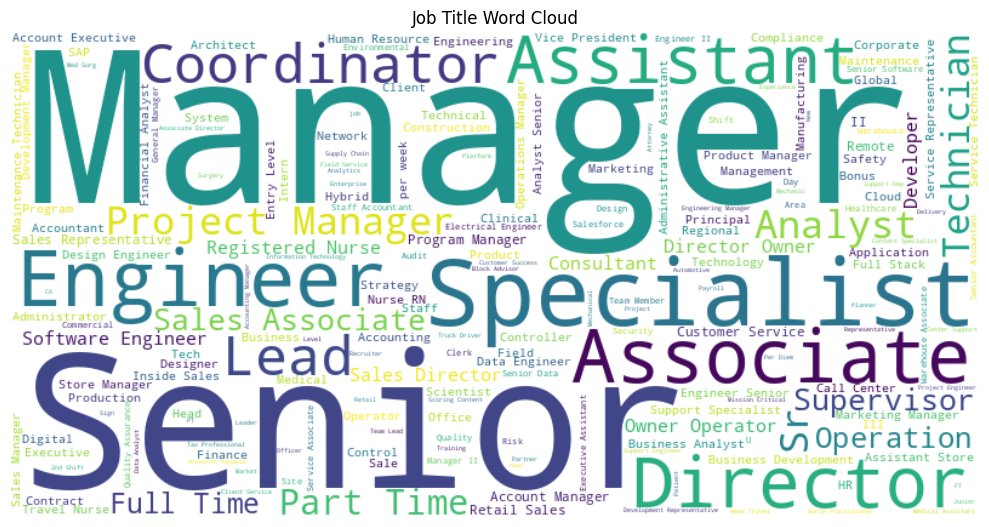

In [13]:
# Create a word cloud from job titles
job_titles_text = ' '.join(data['job_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Job Title Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

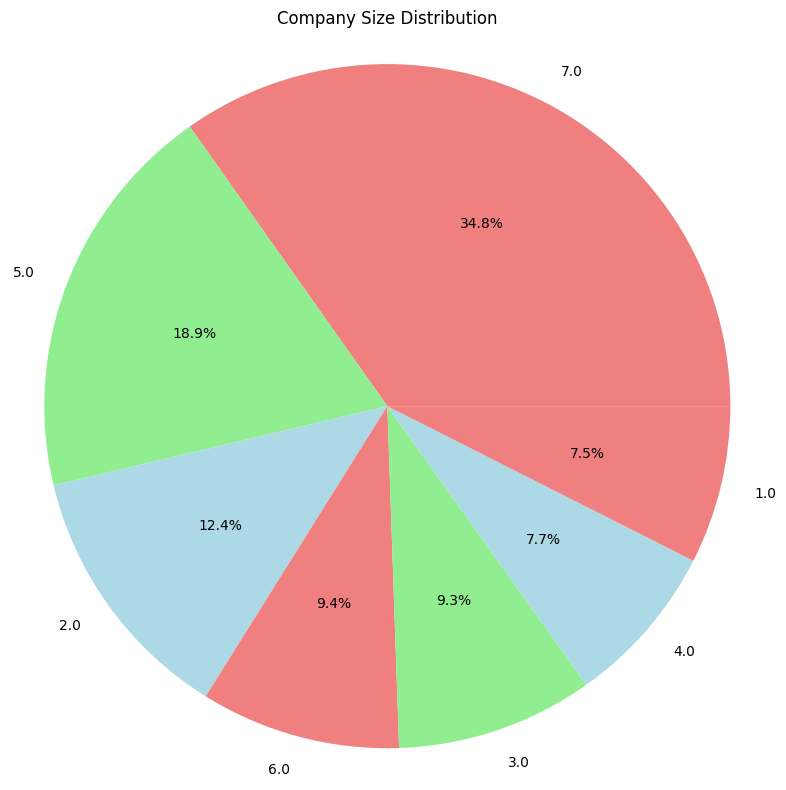

In [14]:
# Visualization 2: Company Size Distribution (Pie Chart)
company_size_counts = data['company_size'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Company Size Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

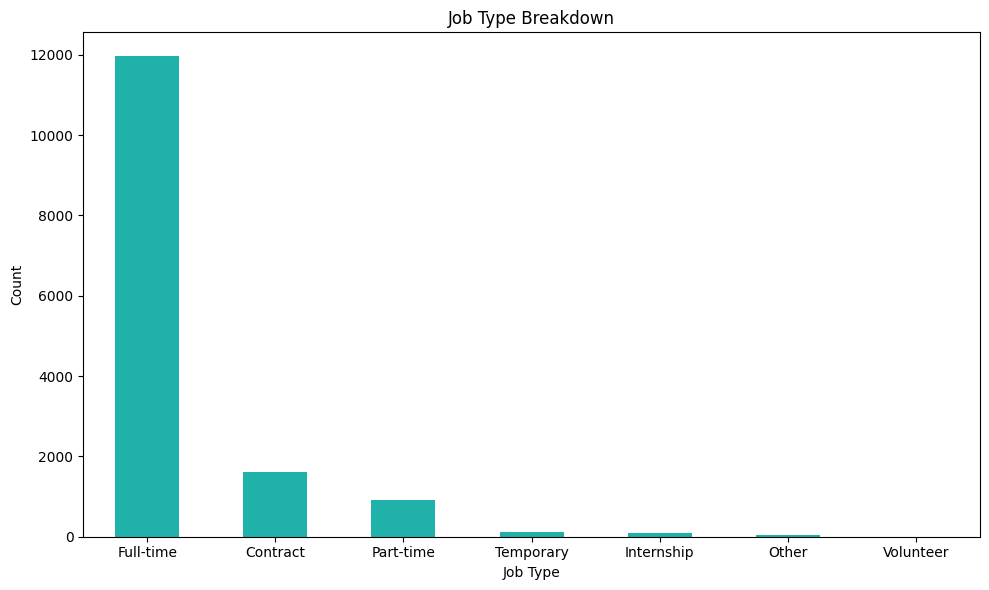

In [15]:
# Visualization 3: Job Type Breakdown (Bar Chart)
job_type_counts = data['work_type'].value_counts()
plt.figure(figsize=(10, 6))
job_type_counts.plot(kind='bar', color='lightseagreen')
plt.title('Job Type Breakdown')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

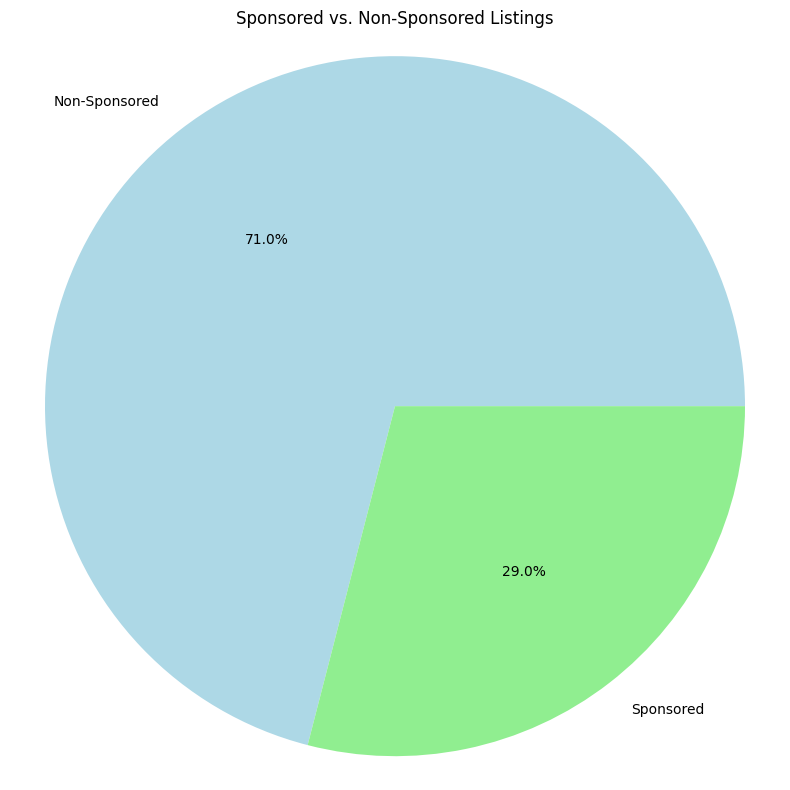

In [16]:
# Visualization 6: Sponsored vs. Non-Sponsored Listings (Pie Chart)
sponsored_counts = data['sponsored'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sponsored_counts, labels=['Non-Sponsored', 'Sponsored'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Sponsored vs. Non-Sponsored Listings')
plt.axis('equal')
plt.tight_layout()
plt.show()